<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Ridge Regression for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)



### PGE 383 Exercise: Ridge Regression for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of ridge regression for subsurface modeling workflows. This should help you get started with building subsurface models with data analytics and machine learning. Here's some basic details about linear regression. 

Ridge regression is an extension of linear regresion, so let's review some basic details about linear regression first.  

#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.

* the parametric model takes the form of: 

\begin{equation}
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
\end{equation}

**Least Squares**

* least squares optimization is applied to select the model parameters, $b_1,\ldots,b_m,b_0$ 

* we minize the error, residual sum of squares (RSS) over the training data: 

\begin{equation}
RSS = \sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2
\end{equation}

* this could be simplified as the sum of square error over the training data, 

\begin{equation}
\sum_{i=1}^n (\Delta y_i)^2
\end{equation}

**Assumptions**

* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Other Resources

This is a tutorial / demonstration of **Linear Regression**.  In $Python$, the $SciPy$ package, specifically the $Stats$ functions (https://docs.scipy.org/doc/scipy/reference/stats.html) provide excellent tools for efficient use of statistics.  
I have previously provided this example in R and posted it on GitHub:

1. R https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.R
2. Rmd with docs https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.Rmd 
3. knit as an HTML document(https://github.com/GeostatsGuy/geostatsr/blob/master/linear_regression_demo_v2.html) 

#### Ridge Regression

With ridge regression we add a hyperparameter, $\lambda$, to our minimization, with a shrinkage penalty term.

\begin{equation}
\sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2 + \lambda \sum_{j=1}^m b_{\alpha}^2
\end{equation}

As a result ridge regression has 2 criteria:

* set the model parameters to minimize the error with training data

* shrink the estimates of the slope parameters towards zero

Note: the intercept is not affected by lambda.

The $\lambda$ is a hyperparameter that controls the degree of fit of the model and may be related to the model variance and bias trade-off.

* for $\lambda \rightarrow 0$ the solution approaches linear regression, there is no bias (relative to a linear model fit), but the variance is high

* as $\lambda$ increases the model variance decreases and the model bias increases

* for $\lambda \rightarrow \infty$ the coefficients approach 0.0 and the model approaches the global mean

#### Workflow Goals

Learn the basics of ridge regression in Python to for analysis, modeling and prediction of porosity from density. This includes:

* Basic Python workflows and data preparation

* Training / fitting a ridge regression model

* Checking the model and learning about the impact of hyperparameters

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the GeostatsPy package.

In [1]:
import os                                                   # to set current working directory 
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # for plotting
from sklearn.metrics import mean_squared_error, r2_score    # specific measures to check our models
from sklearn.linear_model import Ridge                      # ridge regression implemented in scikit learn
from sklearn.model_selection import cross_val_score         # multi-processor K-fold crossvalidation

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [2]:
#os.chdir("C:\PGE337")                                       # set the working directory

#### Loading Data

Let's load the provided dataset. 'Density_Por_data.csv' is available at https://github.com/GeostatsGuy/GeoDataSets. It is a comma delimited file with 20 density ($\frac{g}{cm^3}$) and porosity (as a fraction) measures from the subsurface. We load the data file with the pandas 'read_csv' function into a data frame we called 'df' and then separate it into train and test datasets.  The smaples are in random order so we just split the dataset at the 80th sample.  We preview each with the head function from Pandas DataFrames.

In [10]:
#df = pd.read_csv("Density_Por_data.csv")                    # read a .csv file in as a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load from Prof. Pyrcz's GitHub
df_train = df.iloc[0:80,:]                                  # extract a training set, note samples are random ordered
df_train.head()                                             # preview the DataFrame

,Density,Porosity
0,1.281391,16.610982
1,1.404932,13.668073
2,2.346926,9.590092
3,1.348847,15.877907
4,2.331653,4.968240


In [11]:
df_test = df.iloc[80:]                                      # extract a testing set, note samples are random ordered
df_test.head()                                              # preview the DataFrame

,Density,Porosity
80,1.750352,11.325941
81,1.666285,15.609445
82,1.466517,17.066529
83,1.650921,13.876841
84,0.996736,20.964941


It is useful to review the summary statistics of our loaded DataFrame.  That can be accomplished with the 'describe' DataFrame member function.  We transpose to switch the axes for ease of visualization.  We will summarize over the training and testing subsets separately.

In [12]:
df_train.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Density,80.0,1.759945,0.295260,1.067960,1.552707,1.767908,1.953262,2.410560
Porosity,80.0,12.187127,3.125755,4.966421,10.011526,12.170687,14.063670,19.600717


In [13]:
df_test.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Density,25.0,1.667429,0.257608,0.996736,1.568988,1.718085,1.791432,2.339324
Porosity,25.0,13.632564,2.948887,9.489298,11.325941,13.767060,15.051759,20.964941


Here we extract the ndarrays with porsity and density, training and testing datasets separate arrays for convenience.

In [14]:
por_train = df_train['Porosity'].values                     # make a shallow copy of the features for convenvience
df = pd.read_csv("Density_Por_data.csv")                    
den_train = df_train['Density'].values
por_test = df_test['Porosity'].values
den_test = df_test['Density'].values
n_train = len(df_train); n_test = len(df_test)              # get the number of data in training and testing

Let's look at the training and testing data.

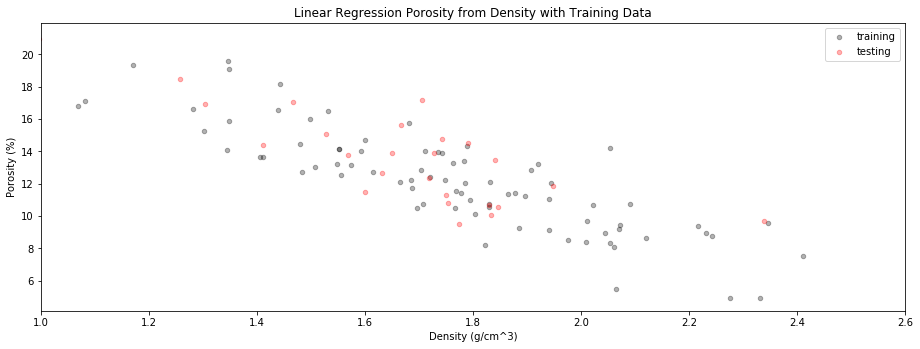

In [15]:
plt.subplot(111)
plt.scatter(df_train["Density"].values, df_train["Porosity"],  color='black', s = 20, alpha = 0.3, label = 'training')
plt.scatter(df_test["Density"].values, df_test["Porosity"],  color='red', s = 20, alpha = 0.3, label = 'testing')
plt.title('Linear Regression Porosity from Density with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.legend()
plt.xlim(1.,2.6)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

#### Linear Regression Model

Let's first calculate the linear regression model. We use scikit learn and then extend the same workflow to ridge regression.

Coefficients:  -8.961, Intercept:  27.958


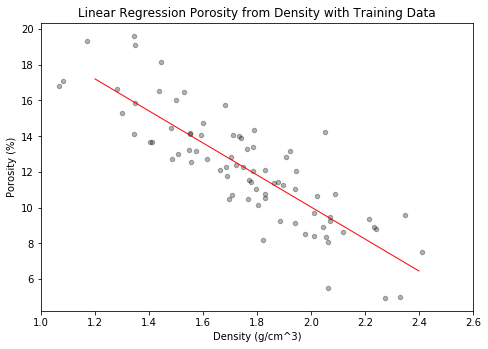

In [16]:
from sklearn import linear_model

# Step 1. Instantiate the Model 
linear_reg = linear_model.LinearRegression()

# Step 2: Fit the Data on Training Data
linear_reg.fit(df_train["Density"].values.reshape(n_train,1), df_train["Porosity"]) # fit model
density_model = np.linspace(1.2,2.4,10)

# Print the model parameters
porosity_model = linear_reg.predict(density_model.reshape(10,1)) # predict with the fit model
print('Coefficients: ', str(round(linear_reg.coef_[0],3)) + ', Intercept: ', str(round(linear_reg.intercept_,3))) 

# Plot model fit
plt.subplot(111)
plt.scatter(df_train["Density"].values, df_train["Porosity"],  color='black', s = 20, alpha = 0.3)
plt.plot(density_model,porosity_model, color='red', linewidth=1)
plt.title('Linear Regression Porosity from Density with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.,2.6)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Let's run some quick model checks.  Much more could be done, but I limit this for breviety here. 

Variance explained: 0.58
Residual: mean = -0.62, standard deviation = 3.13


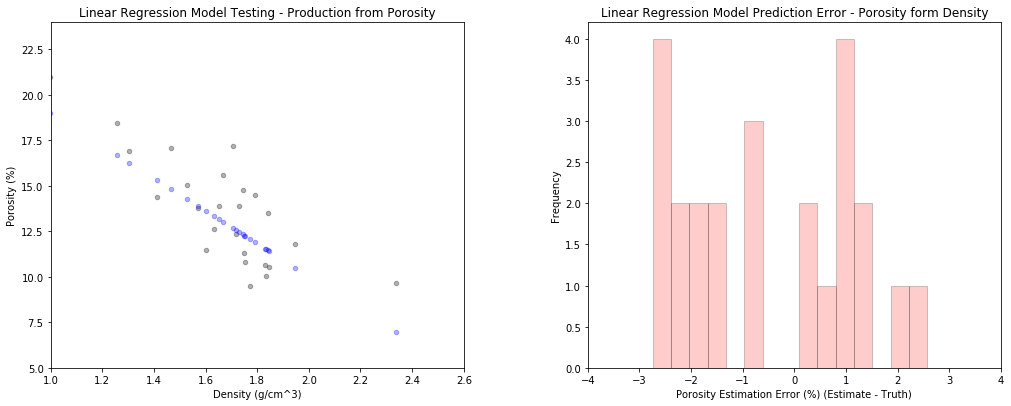

In [17]:
# Step 3: - Make predictions using the testing dataset
y_pred = linear_reg.predict(df_test['Density'].values.reshape(n_test,1))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(df_test['Porosity'].values, y_pred))

# Plot testing diagnostics 
plt.subplot(121)
plt.scatter(df_test['Density'].values, df_test['Porosity'].values,  color='black', s = 20, alpha = 0.3)
plt.scatter(df_test['Density'], y_pred, color='blue', s = 20, alpha = 0.3)
plt.title('Linear Regression Model Testing - Production from Porosity'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.0,2.6); plt.ylim(5,24)

y_res = y_pred - df_test['Porosity'].values

print('Residual: mean = ' + str(round(np.average(y_res),2)) + ', standard deviation = ' + str(round(np.var(y_res),2)))

plt.subplot(122)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Linear Regression Model Prediction Error - Porosity form Density'); plt.xlabel('Porosity Estimation Error (%) (Estimate - Truth)'); plt.ylabel('Frequency')
plt.xlim(-4,4)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Ridge Regression

Let's replace the scikit learn linear regression method with the scikit learn ridge regression method.  Note, we must now set the lambda hyperparameter.

* the hyperparameter is set with the instantiation of the model

Coefficients:  -8.961, Intercept:  27.958


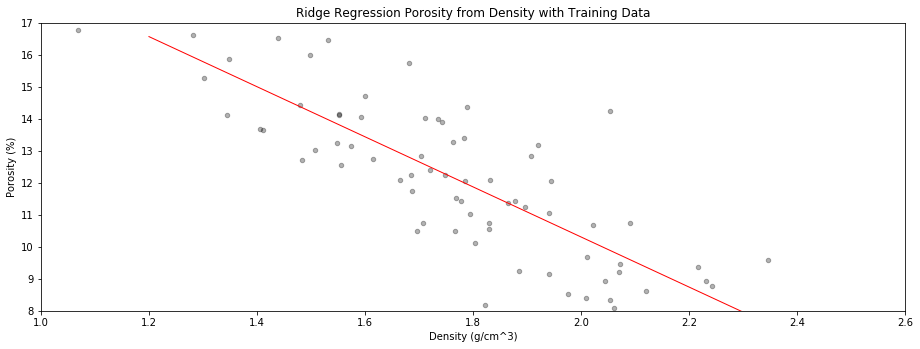

In [18]:
lam = 1.0

# Step 1. Instantiate the Model 
ridge_reg = Ridge(alpha=lam)

# Step 2: Fit the Data on Training Data
ridge_reg.fit(df_train["Density"].values.reshape(n_train,1), df_train["Porosity"]) # fit model
density_model = np.linspace(1.2,2.4,10)

# Print the model parameters
porosity_model = ridge_reg.predict(density_model.reshape(10,1)) # predict with the fit model
print('Coefficients: ', str(round(linear_reg.coef_[0],3)) + ', Intercept: ', str(round(linear_reg.intercept_,3))) 

# Plot model fit
plt.subplot(111)
plt.scatter(df_train["Density"].values, df_train["Porosity"],  color='black', s = 20, alpha = 0.3)
plt.plot(density_model,porosity_model, color='red', linewidth=1)
plt.title('Ridge Regression Porosity from Density with Training Data'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.,2.6); plt.ylim(8,17)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Let's repeat the simple model checks that we applied with our linear regression model.

Variance explained: 0.55
Residual: mean = -0.72, standard deviation = 3.22


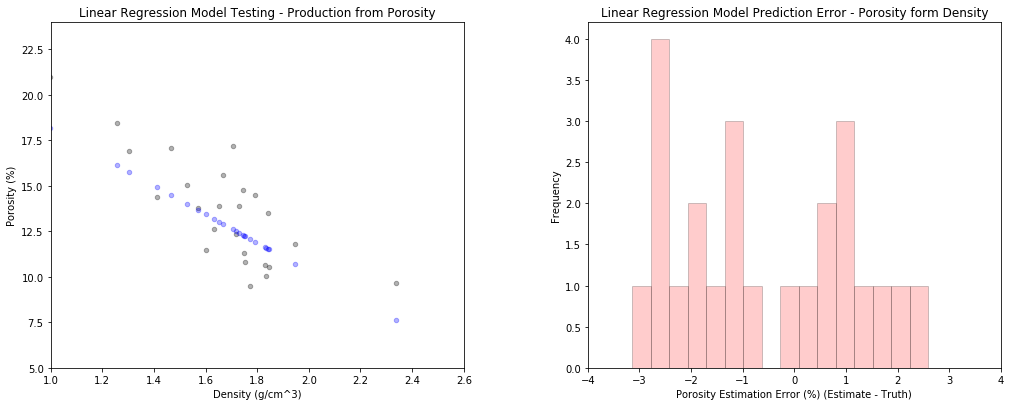

In [19]:
# Step 3: - Make predictions using the testing dataset
y_pred = ridge_reg.predict(df_test['Density'].values.reshape(n_test,1))

# Report the goodness of fit
print('Variance explained: %.2f' % r2_score(df_test['Porosity'].values, y_pred))

# Plot testing diagnostics 
plt.subplot(121)
plt.scatter(df_test['Density'].values, df_test['Porosity'].values,  color='black', s = 20, alpha = 0.3)
plt.scatter(df_test['Density'], y_pred, color='blue', s = 20, alpha = 0.3)
plt.title('Linear Regression Model Testing - Production from Porosity'); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
plt.xlim(1.0,2.6); plt.ylim(5,24)

y_res = y_pred - df_test['Porosity'].values

print('Residual: mean = ' + str(round(np.average(y_res),2)) + ', standard deviation = ' + str(round(np.var(y_res),2)))

plt.subplot(122)
plt.hist(y_res, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Linear Regression Model Prediction Error - Porosity form Density'); plt.xlabel('Porosity Estimation Error (%) (Estimate - Truth)'); plt.ylabel('Frequency')
plt.xlim(-4,4)#; plt.ylim(0,1500000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

Interesting, we explained less variance and have a larger residual standard deviation (more error).

* we see we actually reduced both testing variance explained and accuracy 

#### Investigating the Lambda Hyperparameter

Let's loop over multiple lambda values - from 0 to 100 and observe the change in:

* training and testing, mean square error (MSE) and variance explained

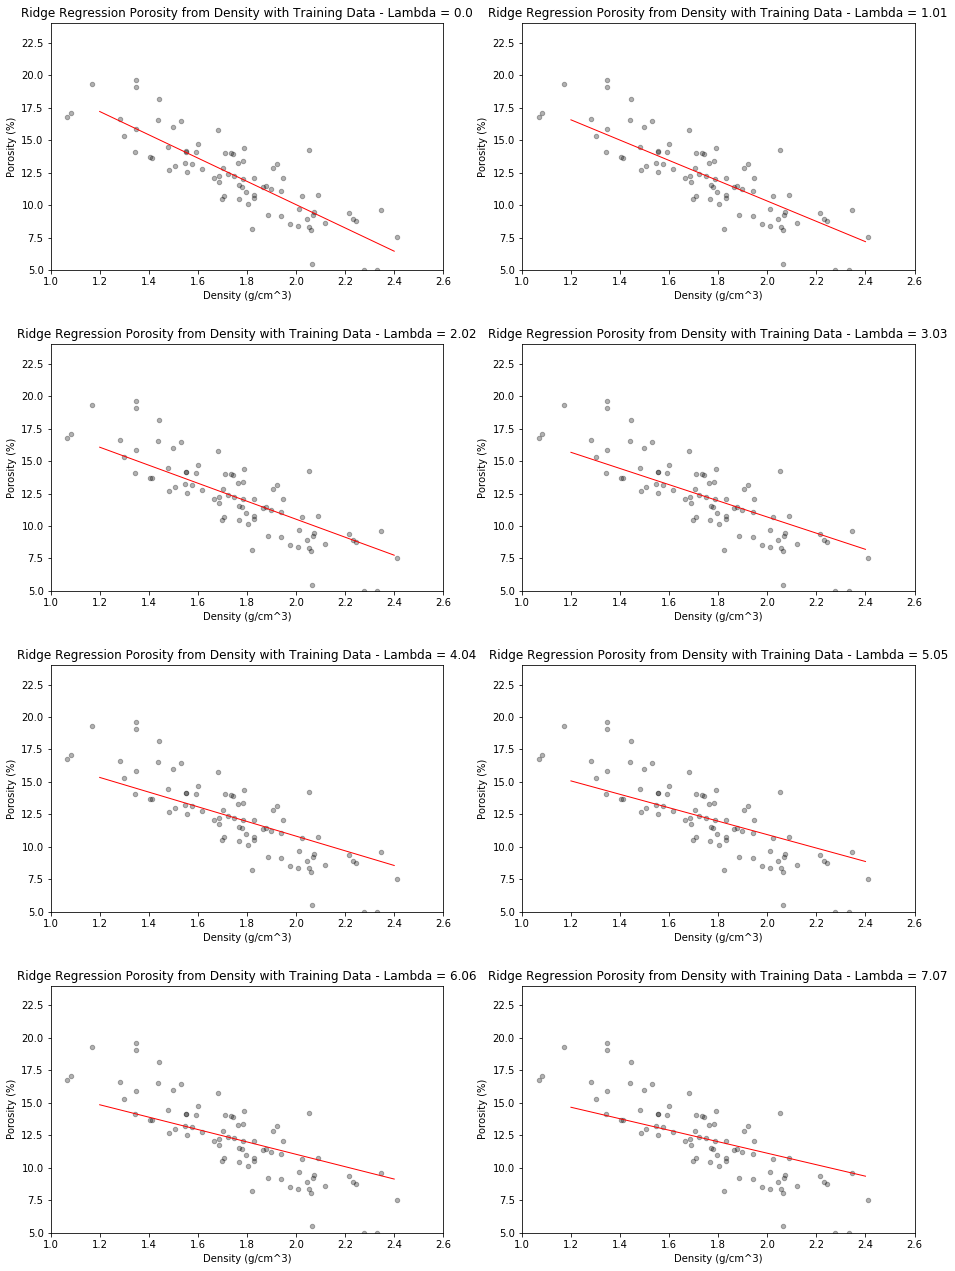

In [20]:
# Arrays to store the results
ncases = 100
lamd_mat = np.linspace(0.0,100.0,ncases)
density_model = np.linspace(1.2,2.4,10)
var_explained_train = np.zeros(ncases); var_explained_test = np.zeros(ncases)
mse_train = np.zeros(ncases); mse_test = np.zeros(ncases)

for ilam in range(0,len(lamd_mat)):                         # Loop over all lambda values
    ridge_reg = Ridge(alpha=lamd_mat[ilam])
    ridge_reg.fit(df_train["Density"].values.reshape(n_train,1), df_train["Porosity"]) # fit model

    porosity_model = ridge_reg.predict(density_model.reshape(10,1)) # predict with the fit model  
    porosity_pred_train = ridge_reg.predict(df_train['Density'].values.reshape(n_train,1)) # predict with the fit model   
    var_explained_train[ilam] = r2_score(df_train['Porosity'].values, porosity_pred_train)
    mse_train[ilam] = mean_squared_error(df_train['Porosity'].values, porosity_pred_train) 
    
    porosity_pred_test = ridge_reg.predict(df_test['Density'].values.reshape(n_test,1))
    var_explained_test[ilam] = r2_score(df_test['Porosity'].values, porosity_pred_test)
    mse_test[ilam] = mean_squared_error(df_test['Porosity'].values, porosity_pred_test)    
   
    if ilam <= 7:
        plt.subplot(4,2,ilam+1)
        plt.scatter(df_train["Density"].values, df_train["Porosity"],  color='black', s = 20, alpha = 0.3)
        plt.plot(density_model,porosity_model, color='red', linewidth=1)
        plt.title('Ridge Regression Porosity from Density with Training Data - Lambda = ' + str(round(lamd_mat[ilam],2))); plt.xlabel('Density (g/cm^3)'); plt.ylabel('Porosity (%)')
        plt.xlim(1.,2.6); plt.ylim(5,24)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

We can observed from the first 8 cases above of ridge regression model fit that increase in the lambda hyper parameter decreases the slope of the linear fit.

Let's plot the MSE and variance explained over training and testing datasets.

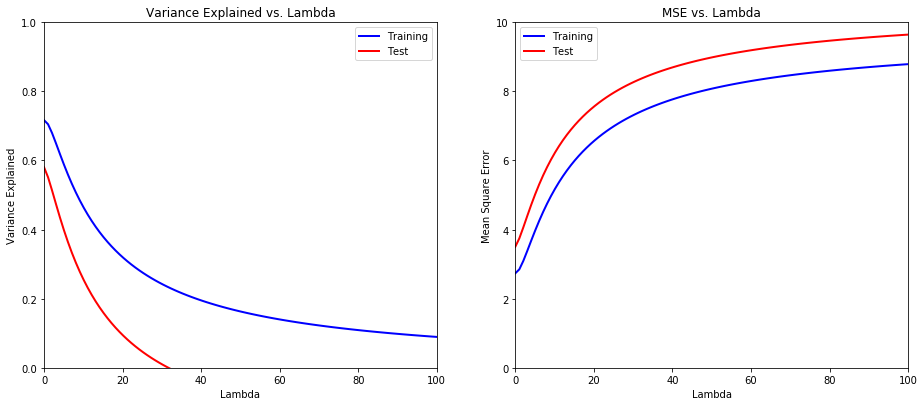

In [21]:
plt.subplot(121)
plt.plot(lamd_mat, var_explained_train,  color='blue', linewidth = 2, label = 'Training')
plt.plot(lamd_mat, var_explained_test,  color='red', linewidth = 2, label = 'Test')
plt.title('Variance Explained vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Variance Explained')
plt.xlim(0.,100.); plt.ylim(0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

plt.subplot(122)
plt.plot(lamd_mat, mse_train,  color='blue', linewidth = 2, label = 'Training')
plt.plot(lamd_mat, mse_test,  color='red', linewidth = 2, label = 'Test')
plt.title('MSE vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Mean Square Error')
plt.xlim(0.,100.); plt.ylim(0,10.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

We observe that as we increase the lambda parameter the variance explained decreases and the mean square error increases.

* this makes sense as the data has a consistent linear trend and as the slope 'shrinks' to zero the error increases and the variance explained decreases

* there could be other cases where the reduced slope actually performs better in testing.  For example with sparce and noisy data. 

#### Model Variance 

Now let's explore the concept of model variance, an important part of machine learning accuracy in testing. 

* the sensitivity of the model to the specfic training data

* as lambda increases the sensitivity to the training data, model variance decreases

Let's demonstrate this with this workflow:

* loop over multiple lambda values
    * loop over multiple bootstrap samples of the data
        * calculate the ridge regression fit (slope)
    * calculate the variance of these bootstrap results


In [22]:
L = 200                                                     # the number of bootstrap realizations 
nsamples = 20                                               # the number of samples in each bootstrap realization
nlambda = 100                                               # number of lambda values to evaluate

coef_mat = np.zeros(L)                                      # declare arrays to store the results
variance_coef = np.zeros(nlambda)

lamd_mat = np.linspace(0.0,100.0,nlambda)
df = pd.read_csv("Density_Por_data.csv")                    
for ilam in range(0,len(lamd_mat)):                         # loop over all lambda values                   
    for l in range(0, L):                                   # loop over all bootstrap realizations
        df_sample = df.sample(n = nsamples)                 # random sample (1 bootstrap)
        ridge_reg = Ridge(alpha=lamd_mat[ilam])             # instatiate model
        ridge_reg.fit(df_sample["Density"].values.reshape(nsamples,1), df_sample["Porosity"]) # fit model
        coef_mat[l] = ridge_reg.coef_[0]                    # get the slope parameter
    
    variance_coef[ilam] = np.var(coef_mat)                  # calculate the variance of the slopes over the L bootstraps

Now let's plot the result.

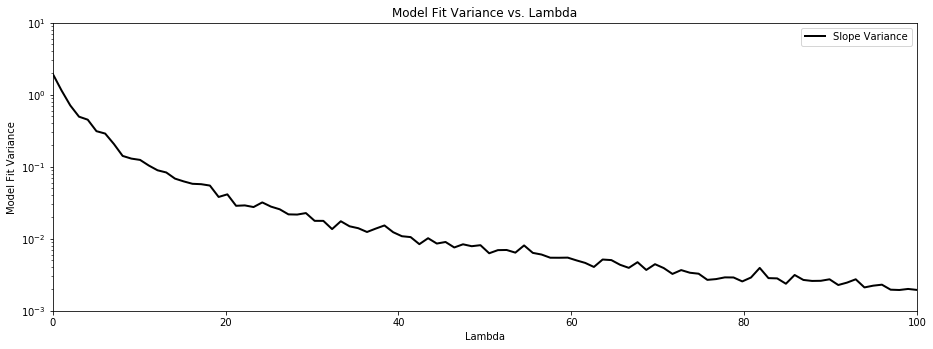

In [23]:
plt.subplot(111)
plt.plot(lamd_mat, variance_coef,  color='black', linewidth = 2, label = 'Slope Variance')
plt.title('Model Fit Variance vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Model Fit Variance')
plt.xlim(0.,100.); plt.ylim(0.001,10.0); plt.yscale('log')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

The result is as expected, with increase in lambda hyperparameter the sensitivity of the model to the training data is decreased.

#### k-fold Cross Validation

It would be useful to conduct a complete k-fold validation to evaluate the testing error vs. the hyperparameter lambda for model tuning.

* the following code should do this 

* but with a single feature as input for fitting the fit function requires a reshape

```python
my_array.reshape((nsample,1))
```

* this is not included in the scikit learn function 'cross_val_score' so we will skip this for now

I have left the code commented out below for reference:

In [24]:
#score = []                                                  # code modified from StackOverFlow by Dimosthenis
#nlambda = 1
#lambd_mat = np.linspace(0.0,100.0,nlambda)
#for ilam in range(0,nlambda):
#    ridge_reg = Ridge(alpha=lambd_mat[ilam])
#    scores = cross_val_score(estimator=ridge_reg, X= df['Density'].values, y=df['Porosity'].values, cv=10, n_jobs=4, scoring = "neg_mean_squared_error") # Perform 10-fold cross validation
#    score.append(abs(scores.mean()))

#### Comments

Ridge regression is a variant of linear regression that includes a hyperparameter to constrain the degree of model fit.  This allow us to tune the variance-bias trade-off of our model. I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
